In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Useful functions
---

In [2]:
def display_svg(data):
    from IPython.display import SVG, display
    display(SVG(data))

In [3]:
def export_svg(data, filename):
    f = open(f'{filename}.svg', "w")
    f.write(data)
    f.close()

# Build SVG
---

In [4]:
WIDTH = 360
HEIGHT = 480

In [5]:
SVG = '<?xml version="1.0" encoding="utf-8"?>\n'
SVG += '<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n'

In [6]:
SVG += f'<svg id="image" width="{WIDTH}px" height="{HEIGHT}px" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">'

In [7]:
# define loading text
text = [(e, e) for e in "Loading"]
text += [(".", "d1"), (".", "d2"), (".", "d3")]

## Style
---

In [8]:
SVG += '''

  <style type="text/css">
    svg {
      background-color: hsl(150, 50%, 50%);
    }
    
    circle.load {
      fill: none;
      stroke: black;
      stroke-linecap: round;
    }
    
    text {
      text-anchor: start;
      font-size: 18px;
      font-weight: 800;
      font-family: monospace;
    }
    
    .loading {
      animation: wiggle 2s infinite;
    }
    
    @keyframes wiggle {
      0%, 50%, 100% {
        transform: translate(0, 0);
      }

      20% {
        transform: translate(0, -5px);
      }
      
      35% {
        transform: translate(0, 3px);
      }
      
      45% {
        transform: translate(0, -2px);
      }
    }
'''
dur = 0.0
for (e, _id) in text:
    SVG += f'\n    #{_id} {{animation-delay: {dur:.02f}s;}}'
    dur += 0.1

SVG += '\n\n  </style>'

## References definition
---

In [9]:
SVG += '''
  <defs>
    <!-- ! Gradients -->
    <!-- ! Filters -->
    <!-- ! Symbols -->
    <!-- ! Patterns -->
  </defs>

'''

## Circles
---

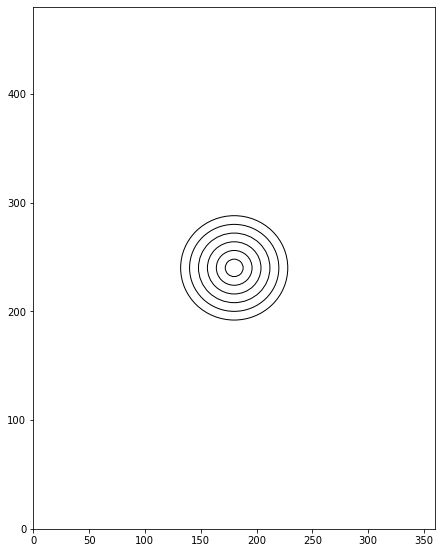

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(36/5, 48/5))

x = WIDTH//2
y = HEIGHT//2
R = np.linspace(8, 48, 6)

for r in R:
    circle = plt.Circle((x, y), r, fill=False)
    ax.add_patch(circle)

ax.set_xlim([0, WIDTH])
ax.set_ylim([0, HEIGHT])

plt.show()

In [11]:
SVG += '  <!-- ! Circles -->\n'
SVG += '  <g id="circles">\n'

np.random.seed(sum([ord(e) for e in list('Circles')]))

for i, r in enumerate(R):
    # define perimeter
    p = 2*np.pi*r

    # define period
    l = 1 + np.random.randint(i + 1)

    # define stroke parameters
    w = f'{2 + np.random.random()*6:.02f}'

    d = np.random.random()*0.25 + 0.5
    sdo = d*p/(2*l) - float(w)/2
    sdi = (1 - d)*p/(2*l) + float(w)/2
    sd = f'{sdo:.02f},{sdi:.02f}'
    
    # define animation parameters
    value = f'{(sdo + sdi)*np.random.choice([-1, 1]):.02f}'
    dur = f'{(1 + np.random.random()*2)*(r + 16)/R.max():.02f}'
    begin = f'{np.random.random()*float(dur):.02f}'

    SVG += f'    <circle class="load" cx="{x}" cy="{y}" r="{r:.02f}" stroke-width="{w}" stroke-dasharray="{sd}">\n'
    SVG += f'      <animate attributeName="stroke-dashoffset" repeatCount="indefinite" '
    SVG += f'values="0;{value}" dur="{dur}s" begin="-{begin}s" />\n'
    SVG += f'    </circle>\n'

SVG += '  </g>\n\n'

## Loading text
---

In [12]:
SVG += '  <!-- ! Loading ... -->\n'
SVG += '  <g id="text" transform="translate(145,320)">\n'

y = 16
x = 0
for (e, _id) in text:
    SVG += f'    <text x="{x}" y="{y}" id="{_id}" class="loading">{e}</text>\n'
    x += 10

SVG += '  </g>\n\n'

## Display SVG
---

In [13]:
SVG += '</svg>\n'

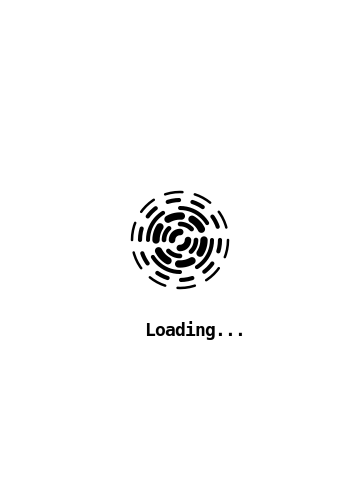

In [14]:
display_svg(SVG)

In [15]:
# print(SVG)

## Export SVG
---

In [16]:
# export_svg(SVG, 'image')